In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Wine dataset.csv')

In [4]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
df['class'].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

In [7]:
df.isnull().sum()
## no null values


class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [8]:
df.duplicated().sum()
#no duplicates

0

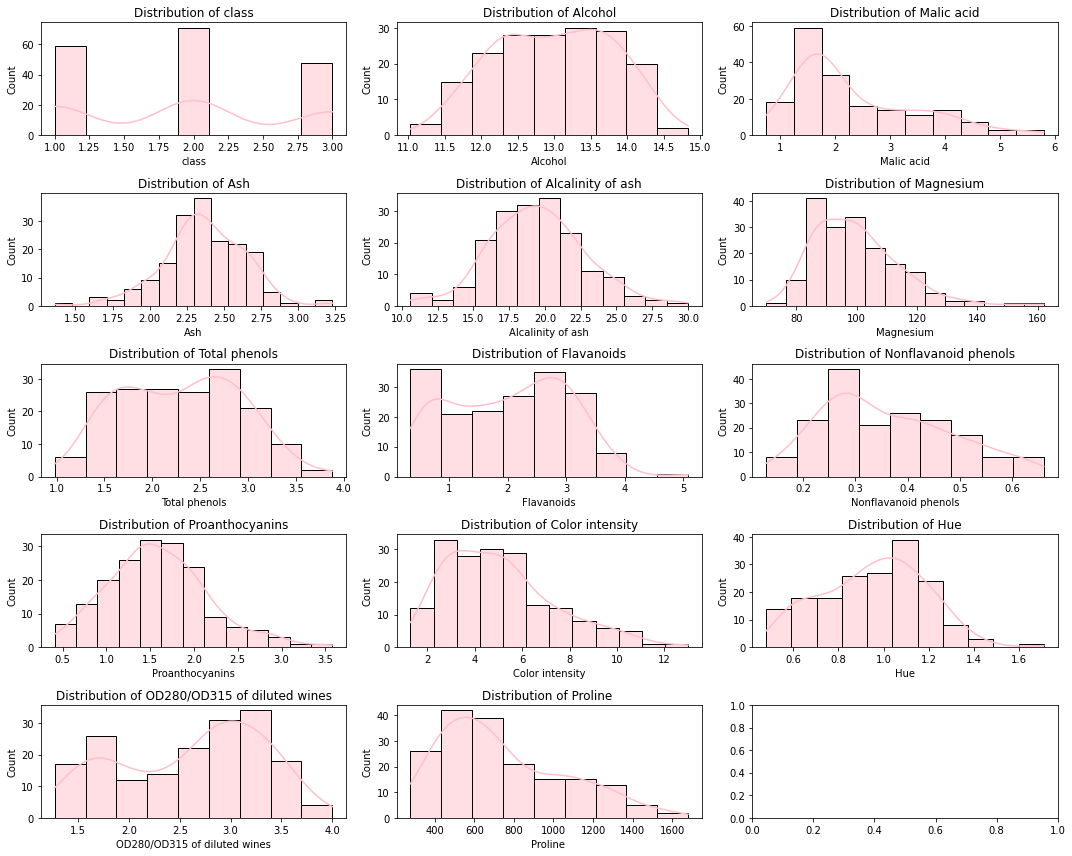

In [10]:
# Plotting histograms with KDE for all features to visualize their distributions and detect skewness or outliers

fig, axes = plt.subplots(5, 3, figsize=(15, 12))  
axes = axes.flatten()

for ix, col in enumerate(df.columns):  
    sns.histplot(x=df[col], kde = True, ax=axes[ix], color='pink')
    axes[ix].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [11]:
skew_dict = {}

for i in df.columns:
    skew_dict[i] = df[i].skew()
    
skew_dict

{'class': 0.10743112358094281,
 'Alcohol': -0.051482331077134784,
 'Malic acid': 1.0396511925814442,
 'Ash': -0.17669931645735712,
 'Alcalinity of ash': 0.21304688642645586,
 'Magnesium': 1.098191054755161,
 'Total phenols': 0.08663858640245253,
 'Flavanoids': 0.02534355338149103,
 'Nonflavanoid phenols': 0.4501513355621236,
 'Proanthocyanins': 0.5171371722998975,
 'Color intensity': 0.8685847909572548,
 'Hue': 0.021091272199709302,
 'OD280/OD315 of diluted wines': -0.30728549895848106,
 'Proline ': 0.7678217813897322}

There are few columns  right skewed for which we will appy the PowerTransformation.

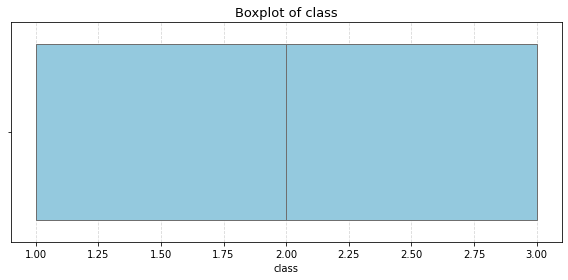

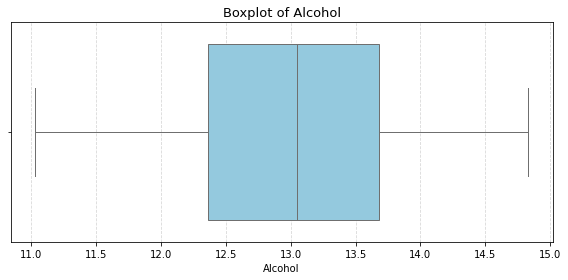

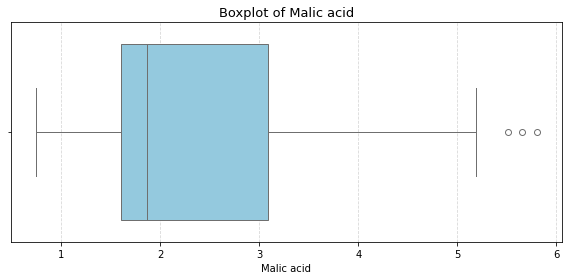

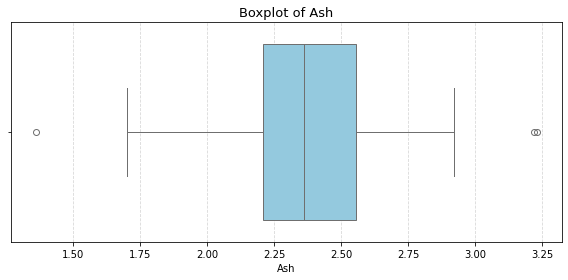

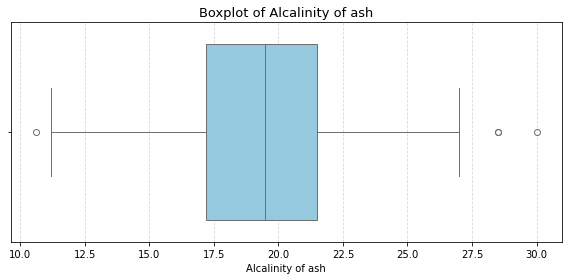

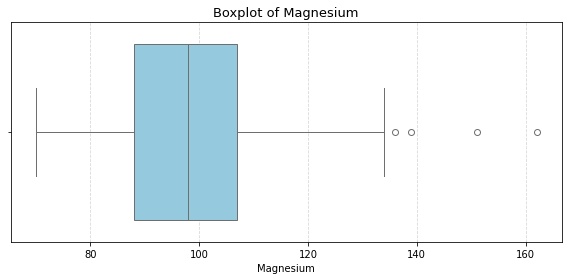

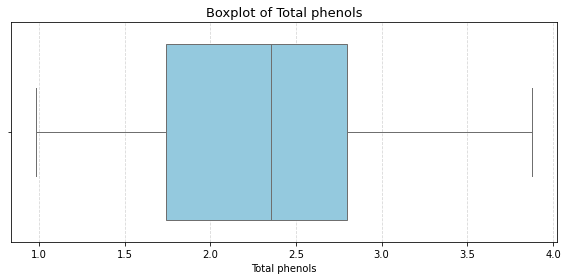

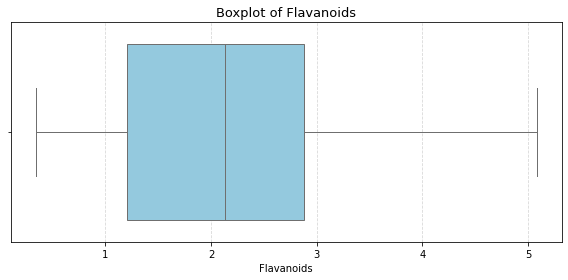

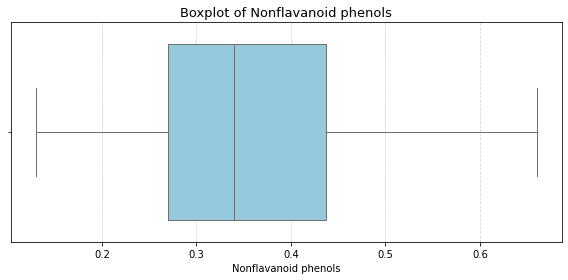

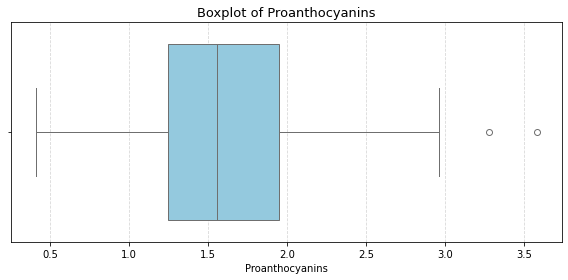

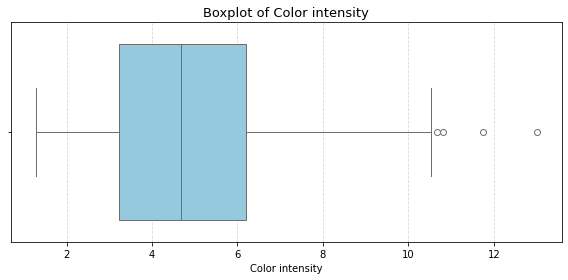

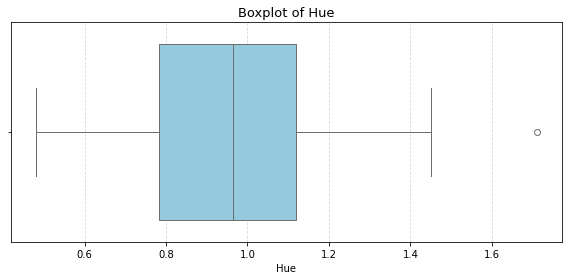

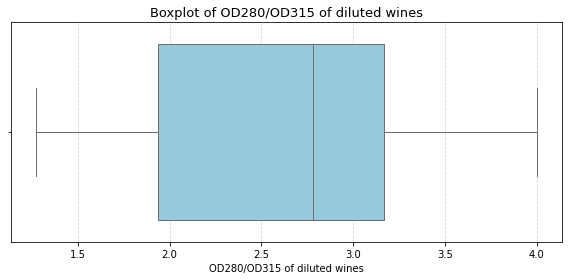

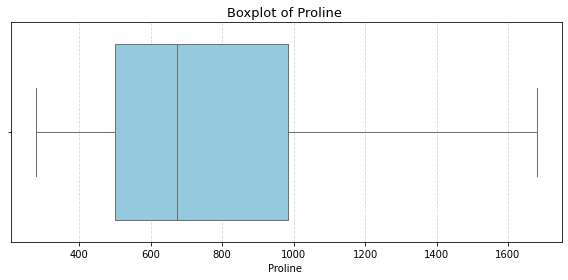

In [18]:
# Checking for the outliers 
for col in df.select_dtypes(include='number').columns: 
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=13)
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

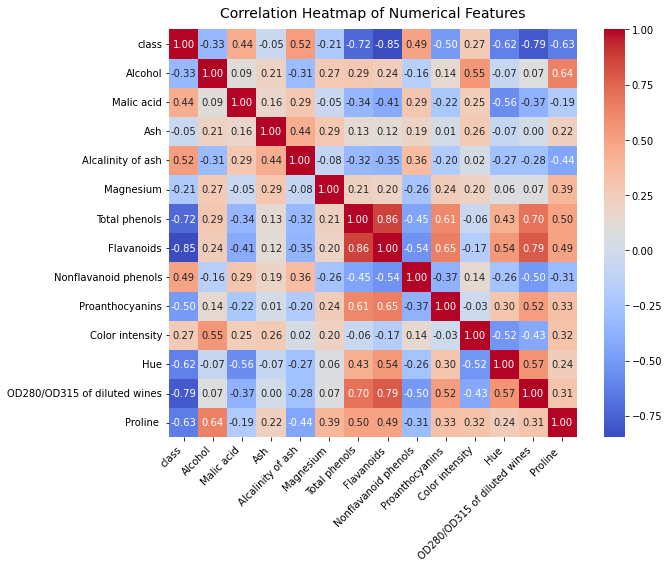

In [12]:
# Heatmap to visualize the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


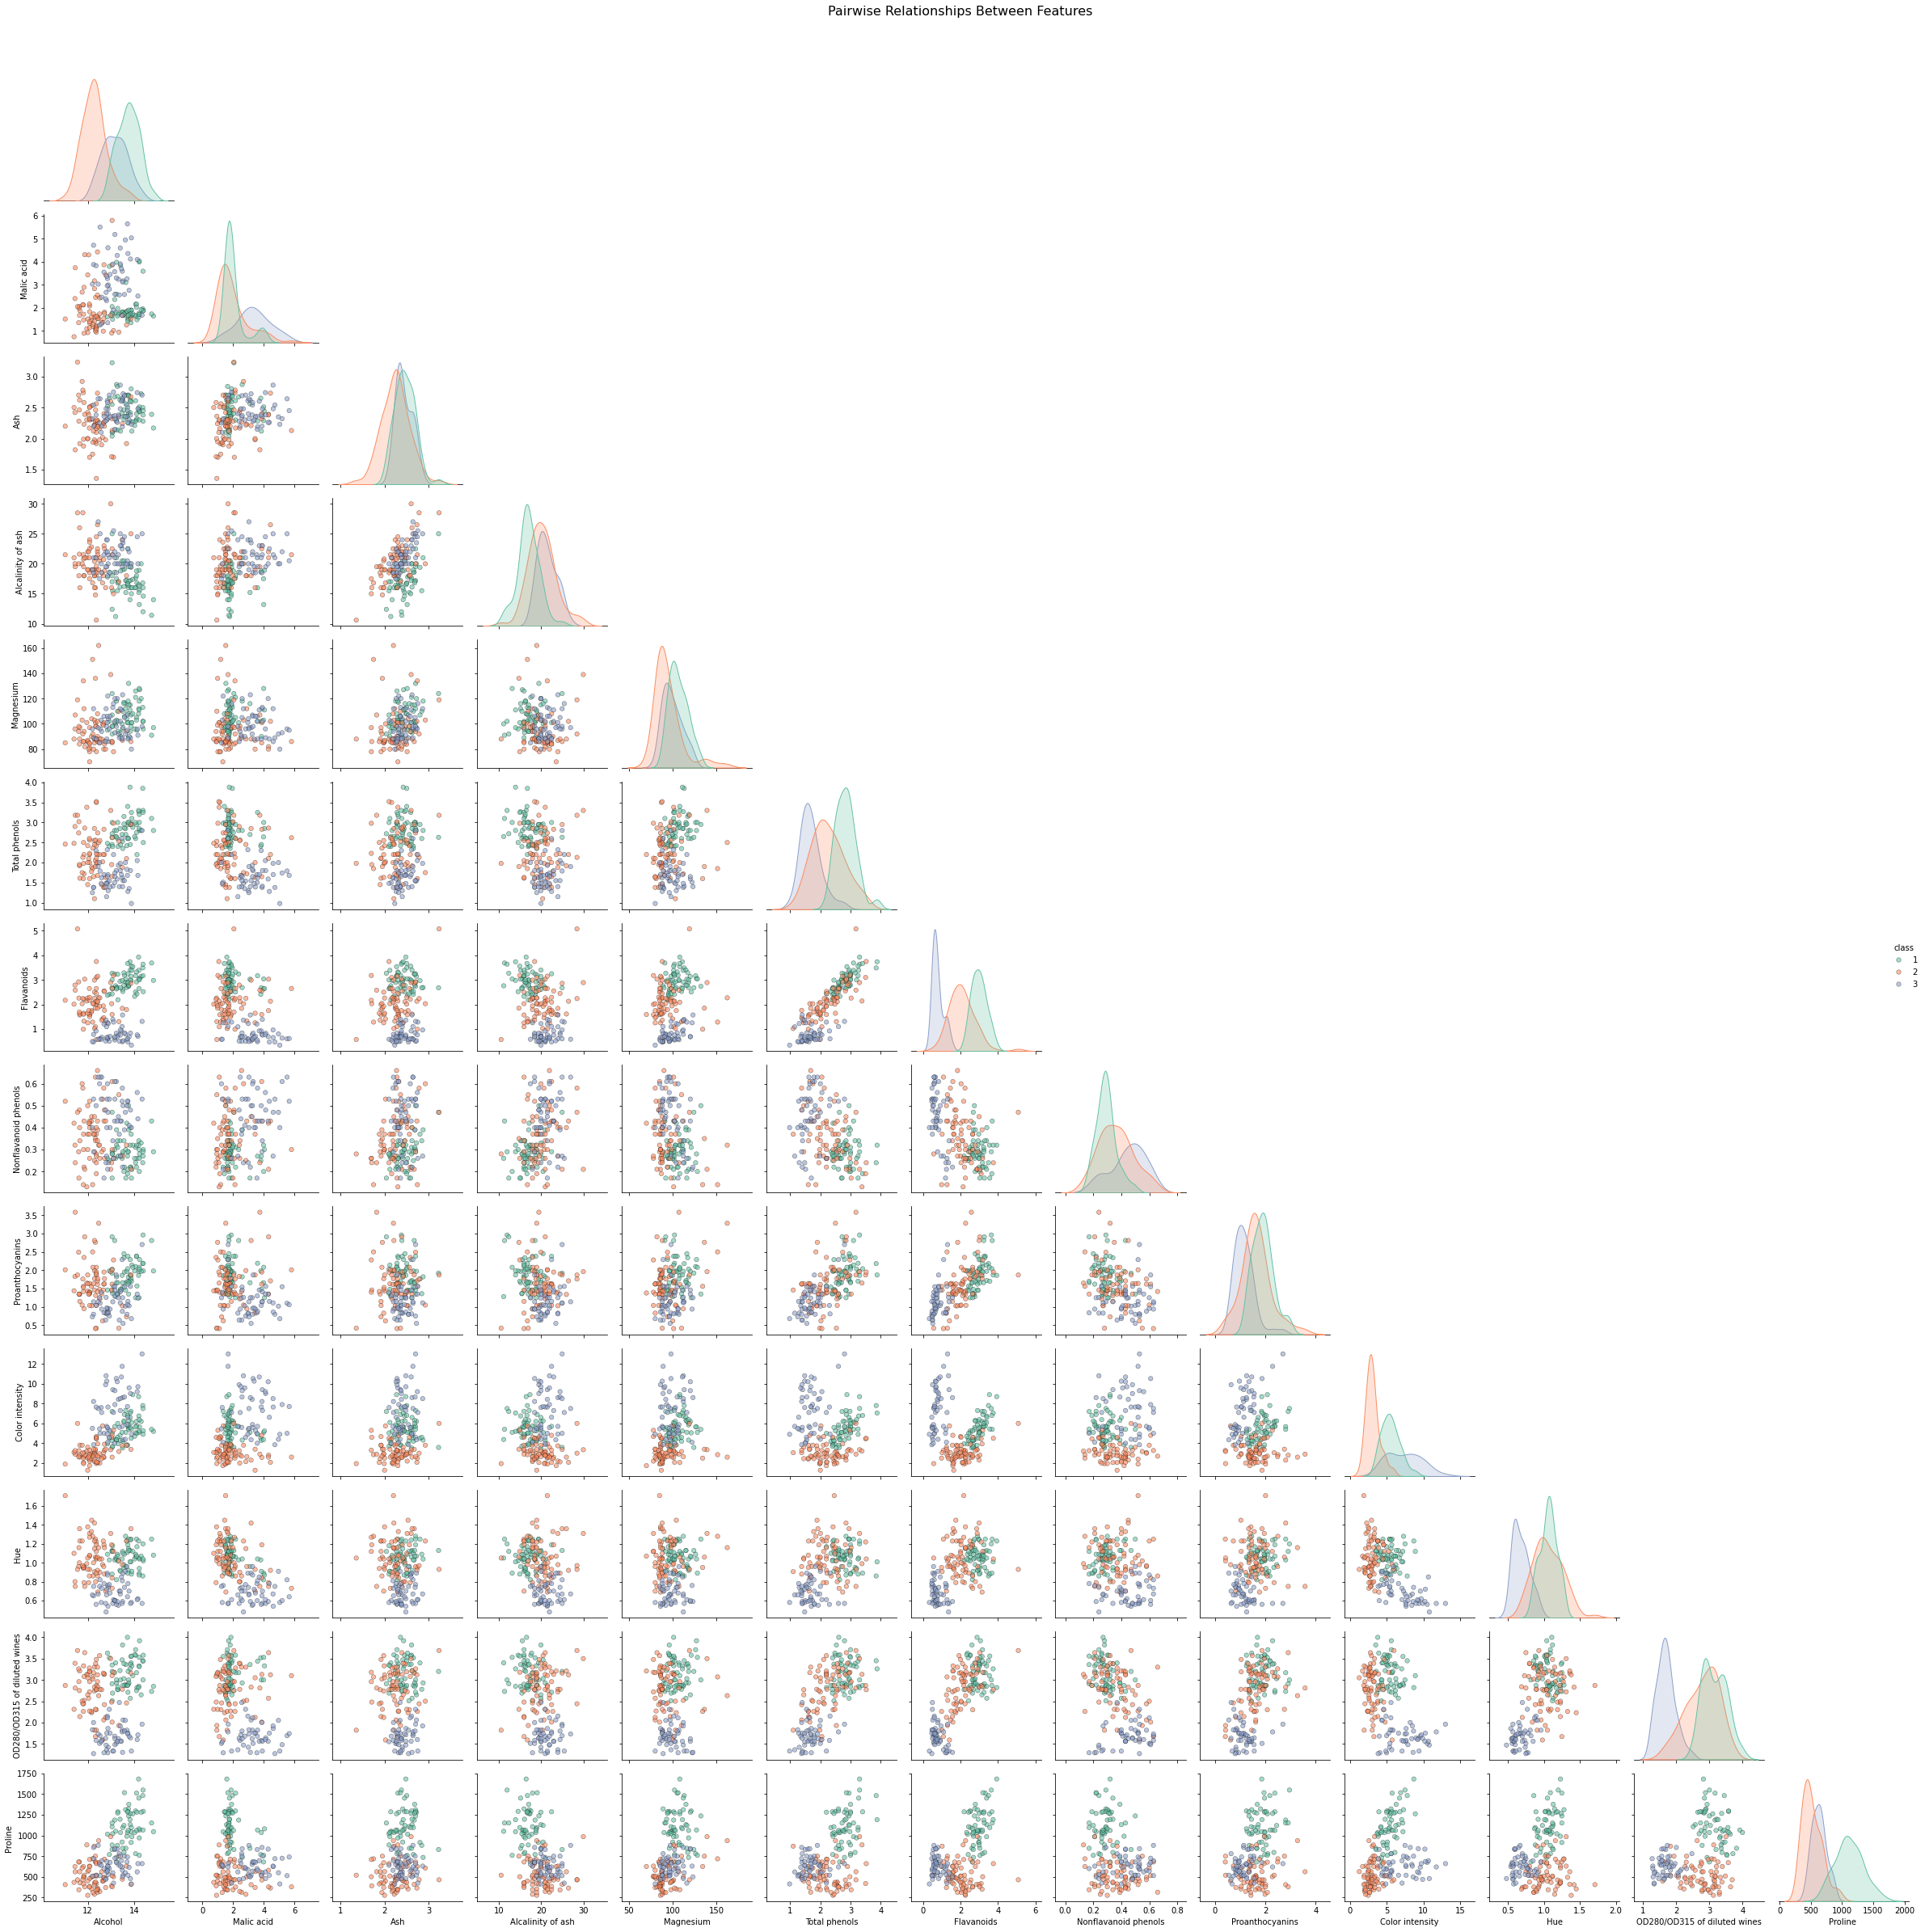

In [17]:
# Pairplot to visualize pairwise relationships and distributions among features

sns.pairplot(df,
             hue= 'class', 
             palette = 'Set2',
             corner=True,
             plot_kws={"alpha": 0.6, "s": 30, "edgecolor": "k"})
plt.suptitle("Pairwise Relationships Between Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Modeling

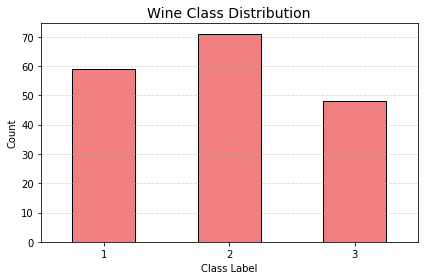

In [19]:
# Target/Class Distribution

df['class'].value_counts().sort_index().plot(
    kind='bar',
    color='lightcoral',
    edgecolor='black'
)

plt.title('Wine Class Distribution', fontsize=14)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
skewed_cols = ['Malic acid', 'Magnesium', 'Color intensity','Proline ' ]
other_cols = [i for i in df.columns if i not in skewed_cols and i != 'class']


In [21]:
X = df.drop('class', axis = 1)
y = df['class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Logistic Regression

In [25]:
preprocessor = ColumnTransformer([
    ('skewed', PowerTransformer(), skewed_cols),
    ('other', 'passthrough', other_cols)
])

In [32]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', LogisticRegression())
])

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('skewed', PowerTransformer(),
                                                  ['Malic acid', 'Magnesium',
                                                   'Color intensity',
                                                   'Proline ']),
                                                 ('other', 'passthrough',
                                                  ['Alcohol', 'Ash',
                                                   'Alcalinity of ash',
                                                   'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'Proanthocyanins', 'Hue',
                                                   'OD280/OD315 of diluted '
                                                   'wines'])])),
                ('model', LogisticRegression())])

In [33]:
y_pred_lr = pipeline.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Random Forest 

In [35]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', RandomForestClassifier(random_state = 42))
])

In [36]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('skewed', PowerTransformer(),
                                                  ['Malic acid', 'Magnesium',
                                                   'Color intensity',
                                                   'Proline ']),
                                                 ('other', 'passthrough',
                                                  ['Alcohol', 'Ash',
                                                   'Alcalinity of ash',
                                                   'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'Proanthocyanins', 'Hue',
                                                   'OD280/OD315 of diluted '
                                                   'wines'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [37]:
y_pred_rf = pipeline_rf.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

